In [116]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Input, Activation, Dense
from keras.utils import np_utils

In [96]:

data = pd.read_csv('./iris.csv')
data =shuffle(data)

print data.columns
data.head(n=10)


Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4,4.6,3.1,1.5,0.2,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
125,126,7.2,3.2,6.0,1.8,Iris-virginica
27,28,5.2,3.5,1.5,0.2,Iris-setosa
49,50,5.0,3.3,1.4,0.2,Iris-setosa
136,137,6.3,3.4,5.6,2.4,Iris-virginica


In [97]:
species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

In [98]:
species = data['Species'].values
print species.shape

quant_species = np.zeros(species.shape)

for ix in range(quant_species.shape[0]):
    quant_species[ix] = species_mapping[species[ix]]

(150,)


In [99]:
ds = np.asarray([data['SepalLengthCm'], data['SepalWidthCm'], data['PetalLengthCm'], data['PetalWidthCm'], quant_species]).astype("float").T
y = quant_species

print ds[120]

[ 5.6  2.9  3.6  1.3  1. ]


In [100]:
split = int(data.shape[0]*0.8)

x_train =ds[:split, :-1]
x_test = ds[split: , :-1]


y_train = np_utils.to_categorical(ds[:split, -1])
y_test = np_utils.to_categorical(ds[split:, -1])

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape 

(120, 4) (30, 4)
(120, 3) (30, 3)


In [109]:
model = Sequential()
model.add(Dense(8, input_shape=(4,)))
model.add(Activation('tanh'))

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(3))
model.add(Activation('softmax'))


model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 8)                 40        
_________________________________________________________________
activation_30 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 45        
_________________________________________________________________
activation_31 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 18        
_________________________________________________________________
activation_32 (Activation)   (None, 3)                 0         
Total params: 103.0
Trainable params: 103.0
Non-trainable params: 0.0
_________________________________________________________________


In [112]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=30, validation_data=(x_test, y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 0s - loss: 0.5919 - acc: 0.7917 - val_loss: 0.5925 - val_acc: 0.7667
Epoch 2/50
120/120 [==============================] - 0s - loss: 0.5872 - acc: 0.8000 - val_loss: 0.5877 - val_acc: 0.8000
Epoch 3/50
120/120 [==============================] - 0s - loss: 0.5832 - acc: 0.8167 - val_loss: 0.5835 - val_acc: 0.7667
Epoch 4/50
120/120 [==============================] - 0s - loss: 0.5797 - acc: 0.8000 - val_loss: 0.5782 - val_acc: 0.8000
Epoch 5/50
120/120 [==============================] - 0s - loss: 0.5757 - acc: 0.8167 - val_loss: 0.5731 - val_acc: 0.8000
Epoch 6/50
120/120 [==============================] - 0s - loss: 0.5717 - acc: 0.8167 - val_loss: 0.5679 - val_acc: 0.8000
Epoch 7/50
120/120 [==============================] - 0s - loss: 0.5683 - acc: 0.8167 - val_loss: 0.5634 - val_acc: 0.8333
Epoch 8/50
120/120 [==============================] - 0s - loss: 0.5638 - acc: 0.8333 - val_lo

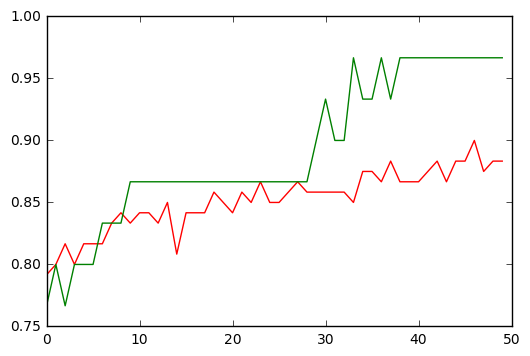

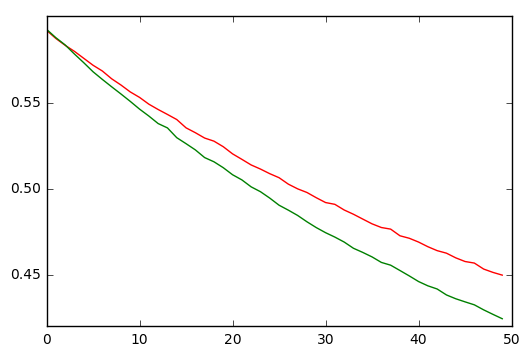

In [117]:
plt.figure(0)
plt.plot(hist.history['acc'], 'r')
plt.plot(hist.history['val_acc'], 'g')

plt.figure(1)
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'g')

plt.show()

In [143]:
prediction = model.predict(x_test)

print ds[135]
print x_test[15]
print y_test[15]

np.argmax(prediction[15])

[ 7.7  3.   6.1  2.3  2. ]
[ 7.7  3.   6.1  2.3]
[ 0.  0.  1.]


2